# Tarea 2
### Daniel Martínez Urrieta

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

### Solución

La función histograma debe recibir un arreglo de números $\vec{R}$ y el número $n_{hist}$ (este valor tiene que ser menor que el tamaño del vector), a partir de ello, obtener el histograma sin normalizar. Para dicha obtención, hay que notar que si $\Delta x = (\sup(\vec{R})- \inf(\vec{R}))/n_hist$ entonces $x_i$ y $x_{i-1}$ se pueden obtener de la siguiente forma:
\begin{align}
    x_i &= i\Delta x + x_0 \\
    x_{i-1} &= (i-1)\Delta x + x_0
\end{align}

Afortunadamente, `Julia` puede ordenar los valores del arreglo mediante la función `sort`, aprovechando esto, podemos revisar la condición de si un valor `R[j]` cumple que $R_j < x_i $.

Primero se creará el vector $V$ que contendrá el histograma con la función `zeros(n_hist)`, posteriormente se usará un loop `for` para llenar cada entrada `i` (desde 1 hasta `n_hist`) con el conteo de números contenidos en $[x_{i-1},x_i)$. Para realizar el conteo, se implementará otro `for` que corra desde el valor $l= (\sum_{j=1}^{i}V_j) + 1$ (ya que los valores anteriores ya fueron contados) hasta $n_hist$ por principio de cuentas. En este segundo `for` implementaremos una operación ternaria donde verifique si el valor $R_r < x_i$, en caso positivo, sumará uno en un contador, de lo contrario, se romperá el loop con la instrucción `break`, una vez terminado, almacena el valor del contador en `V[i]`, continuando el loop con reiniciando el valor del contador a 0 y calculando el siguiente $x_i$.

### Anotación con respecto a primera revisión

Hay error porque el tamaño del vector de índices es distinto al tamaño del vector del histograma, entonces es conveniente que la función `histograma` regrese también un vector de índices adecuado.

In [1]:
"""
`histograma(arr, n_hist)` obtiene el histograma de frecuencias sin normalizar del arreglo de N valores `Float64`
considerando `n_hist` intervalos de longitud Δx = (sup(`arr`)-inf(`arr`))/`n_hist`. Es necesario que 0 < `n_hist`
≦ N.

***Nota:*** El arreglo debe tener como mínimo un elemento.
Dicho histograma es devuelto como un vector con `n_hist` entradas, cada entrada tiene el número de valores
encontrados en el intervalo [x_{i-1},x_i).

La función devuelve dos vectores: `index` e `histo`. `index` contiene los índices adecuados para la graficación, 
`index` contiene los datos del histograma.
"""
function histograma(arr::Array{Float64,1},n_hist::Int) #Requerimos el vector de datos, así como n_hist
    n = length(arr)
    n == 0 ? error("Tamaño de arreglo inválido. Revisa la documentación"):
    (n < n_hist || n_hist <= 0) ? error("Valor para `n_hist` inválido. Revisa la documentación.") :
    orden = sort(arr) #Ordena elementos aleatorios
    Δx = (orden[end] - orden[1])/n_hist #Calculamos Δx
    vector = zeros(n_hist) #Creamos el vector de salida
    for i in 1:n_hist
        contador = 0 #Contador de número de elementos en el intervalo
        x_i = i*Δx + orden[1] #Forma genérica de obtener x_i
        last = round(Int64,sum(vector[1:i]) + 1) #Aunque sé que esto siempre es entero, sum() devuelve Float64
        for r in last:n
            check = orden[r]
            check < x_i ? contador += 1 : break
        end
        vector[i] = contador
    end
    vector[end] += 1
    indices = collect(1:n_hist)
    indices, vector
end

histograma (generic function with 1 method)

In [2]:
? histograma

search: 

`histograma(arr, n_hist)` obtiene el histograma de frecuencias sin normalizar del arreglo de N valores `Float64` considerando `n_hist` intervalos de longitud Δx = (sup(`arr`)-inf(`arr`))/`n_hist`. Es necesario que 0 < `n_hist` ≦ N.

***Nota:*** El arreglo debe tener como mínimo un elemento. Dicho histograma es devuelto como un vector con `n_hist` entradas, cada entrada tiene el número de valores encontrados en el intervalo [x_{i-1},x_i).

La función devuelve dos vectores: `index` e `histo`. `index` contiene los índices adecuados para la graficación,  `index` contiene los datos del histograma.


Usemos la función `histograma` dándole un vector con 1000 números aleatorios, posteriormente se graficará el vector con el histograma usando la función `xcorr` y se comparará con el que se obtenga de la función `histogram` con los datos originales.

In [3]:
using PyPlot

histograma



In [4]:
al = randn(10000)
index, histo = histograma(al, 100);

In [33]:
@time test = histograma(al, 100);

  0.002543 seconds (112 allocations: 128.906 KB)


In [32]:
@time test = hist(al, 100);

  0.005694 seconds (20.01 k allocations: 625.922 KB)


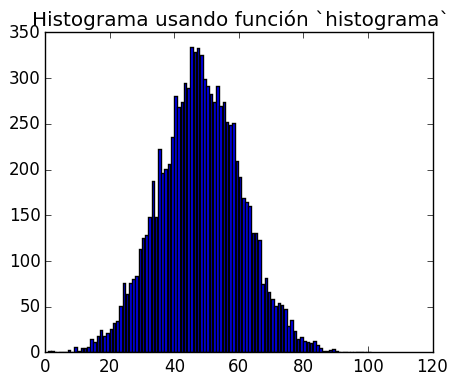

PyObject <matplotlib.text.Text object at 0x7f0c1243cf60>

In [5]:
figure(figsize=(5,4))
bar(index,histo)
title("Histograma usando función `histograma`")

In [6]:
length(histo)

100

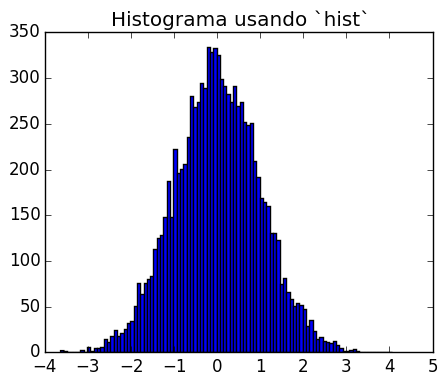

PyObject <matplotlib.text.Text object at 0x7f0c0fac0b00>

In [7]:
figure(figsize = (5,4))
plt[:hist](al,100)
title("Histograma usando `hist`")

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [8]:
"""
`prom_var(arr)` devuelve el valor del promedio y la varianza de los datos contenidos en un `Array{Float64,1}`,
es requerido que `arr`tenga por lo menos un dato`
"""
function prom_var(arr::Array{Float64,1})
    n = length(arr)
    n == 0 ? error("Tamaño de arreglo inválido. Revisa la documentación.") :
    prom = sum(arr)/n
    var = (sum(arr.*arr))/n -prom^2
    Val = Float64[prom, var]
    Val
end

prom_var (generic function with 1 method)

In [9]:
R = prom_var(al)

2-element Array{Float64,1}:
 -0.0017804
  0.979513 

In [10]:
R - [mean(al), var(al)]

2-element Array{Float64,1}:
  0.0       
 -9.79611e-5

***a)*** Se nota una pequeña diferencia entre el valor de la varianza calculada con mi subrutina y la que calcula Julia, con el promedio no se tiene discrepancia.

***b)*** Se implementará la función `prom_var2` empleando el algoritmo recursivo citado.

In [11]:
"""
`prom_var2(arr)` calcula el valor del promedio y la varianza de los datos contenidos en `arr` empleando un 
[algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).

Es requerido que `arr` sea del tipo `Array{Float64,1}` y que contenga por lo menos un dato.
"""
function prom_var2(arr::Array{Float64,1})
    length(arr) == 0 ? error("Tamaño de arreglo inválido, revisa la documentación.") :
    prom = 0.0
    var = 0.0
    n = 0
    for x in arr
        n += 1
        r = (x - prom)/n
        prom += r
        var = (n-1)*var/n + r*(x-prom)
    end
    Float64[prom, var]
end        

prom_var2 (generic function with 1 method)

In [12]:
? prom_var2

search: 

`prom_var2(arr)` calcula el valor del promedio y la varianza de los datos contenidos en `arr` empleando un  [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).

Es requerido que `arr` sea del tipo `Array{Float64,1}` y que contenga por lo menos un dato.


In [13]:
prom_var2(al)

2-element Array{Float64,1}:
 -0.0017804
  0.979513 

*** c) *** Para revisar la eficiencia de los métodos crearemos 5 arreglos de números aleatorios de distinto orden de magnitud, crearemos una subrutina que use el macro `@time` y devuelva el tiempo empleado para calcular el método y la varianza usando los tres métodos disponibles.

In [14]:
"""
`prom_var3(arr)` regresa los valores de promedio y la varianza asociada a los datos en `arr` usando las funciones
de `Julia`: `mean` y `var`.

Es requerido que `arr` sea del tipo `Array{Float64,1}` y que contenga por lo menos un dato.
"""
function prom_var3(arr::Array{Float64,1})
    length(arr) == 0 ? error("Tamaño de arreglo inválido, revisa la documentación.") :
    Float64[mean(arr), var(arr)]
end

prom_var3 (generic function with 1 method)

In [15]:
function evalua_tiempo(arr::Array{Float64,1})
    println("Tiempo usando `prom_var`")
    @time ar = prom_var(arr)
    @time ar = prom_var(arr)
    println("Tiempo usado `prom_var2`")
    @time ar = prom_var2(arr)
    @time ar = prom_var2(arr)
    println("Tiempo usado `prom_var3`")
    @time ar = prom_var3(arr)
    @time ar = prom_var3(arr)
end

evalua_tiempo (generic function with 1 method)

In [16]:
al1 = randn(100) #100 números
evalua_tiempo(al1)

prom_var2 prom_var

Tiempo usando `prom_var`


2-element Array{Float64,1}:
 -0.0318971
  1.18483  

In [17]:
al2 = randn(1000) #1000 números
evalua_tiempo(al2)

2-element Array{Float64,1}:
 -0.0562137
  1.05767  

In [18]:
al3 = randn(10000) #10000 números
evalua_tiempo(al3)

2-element Array{Float64,1}:
 -0.00247327
  0.975297  

In [19]:
al4 = randn(100000)
evalua_tiempo(al4)

2-element Array{Float64,1}:
 -0.000263448
  1.00694    

*** Respuesta: *** Por lo observado en lo anterior el método más efectivo para calcular varianzas y promedios es emplear las funciones de `Julia` y usando el método no recursivo en segundo lugar.

## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

Este método aproxima a una función $f(x)$ mediante una parábola con ayuda de los polinomios interpolantes de Lagrange. Después de una talacha se puede llegar a que la integral de una función $f$ en un intervalo $[a,b]$ está dada por:
$$\int_a^bf(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$

Siguiendo ésta fórmula se implementará la función `simpson()`

### Anotación respondiendo a la primera revisión

El valor es malo dado a que el método se aplica a un intervalo bastante grande, entonces, debe ser agregado un parámetro `n` para dividir el intervalo en n pedazos e integrar la función en cada pedazo usando la fórmula de arriba. Al fin que la integral respeta que:

$$\int_{x_0}^{x_n}f(x)dx = \int_{x_0}^{x_1}f(x)dx + \int_{x_1}^{x_2}f(x)dx + \dotsm + \int_{x_{n-1}}^{x_n}f(x)dx$$

donde $x_0 = a$ y $x_n = b$. Implementaremos esto a la función `simpson`. `n` tendrá un valor por defecto de `n=100`. Esto debería reducir el error considerablemente.

In [20]:
"""
`simpson(f, a, b, n=100)` calcula la integral de la función `f` en el intervalo [a,b] empleando la regla de Simpson
simple sobre `n` subintervalos del intervalo [a,b] cuya distancia es de Δx = (b-a)/n. El valor por defecto en la
partición de subintervalos es n = 100.

Es  necesario que f sea una función, que a, b sean valores reales y que n sea un entero positivo.
"""
function simpson(f::Function, a::Real, b::Real, n = 100::Int)
    n == 0 ? error("Valor de `n` inválida. Por favor revise la documentación."):
    integral = 0.0
    Δx = (b-a)/n
    for i in 1:n
        x_i = i*Δx + a
        x_im1 = (i-1)*Δx + a
        h = (x_i + x_im1)/2
        integral += (f(x_im1) + 4*f(h) + f(x_i)) * (x_i-x_im1)/6
    end
    integral
end

simpson (generic function with 2 methods)

  0.001325 seconds (47 allocations: 3.141 KB)
  0.000013 seconds (11 allocations: 1.234 KB)
Tiempo usado `prom_var2`
  0.000002 seconds (102 allocations: 1.656 KB)
  0.000002 seconds (102 allocations: 1.656 KB)
Tiempo usado `prom_var3`
  0.000002 seconds (6 allocations: 224 bytes)
  0.000001 seconds (6 allocations: 224 bytes)
Tiempo usando `prom_var`
  0.000012 seconds (13 allocations: 8.281 KB)
  0.000005 seconds (13 allocations: 8.281 KB)
Tiempo usado `prom_var2`
  0.000017 seconds (1.00 k allocations: 15.719 KB)
  0.000017 seconds (1.00 k allocations: 15.719 KB)
Tiempo usado `prom_var3`
  0.000003 seconds (6 allocations: 224 bytes)
  0.000002 seconds (6 allocations: 224 bytes)
Tiempo usando `prom_var`
  0.000031 seconds (14 allocations: 78.578 KB)
  0.000025 seconds (14 allocations: 78.578 KB)
Tiempo usado `prom_var2`
  0.000164 seconds (10.00 k allocations: 156.344 KB)
  0.000165 seconds (10.00 k allocations: 156.344 KB)
Tiempo usado `prom_var3`
  0.000016 seconds (6 allocations: 2

In [21]:
?simpson

search: 

`simpson(f, a, b, n=100)` calcula la integral de la función `f` en el intervalo [a,b] empleando la regla de Simpson simple sobre `n` subintervalos del intervalo [a,b] cuya distancia es de Δx = (b-a)/n. El valor por defecto en la partición de subintervalos es n = 100.

Es  necesario que f sea una función, que a, b sean valores reales y que n sea un entero positivo.


In [22]:
f(x) = sin(x)
simpson(f, 0, π)

2.0000000006764718

simpson



1. Lugar de donde supe como encontrar mínimos y máximos [aquí](http://docs.julialang.org/en/latest/stdlib/math/?highlight=max#Base.max).
2. Sintaxis de Markdown [acá](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lists).